### Training with `categorical_crossentropy` vs `sparse_categorical_crossentropy`  

In [1]:
import numpy as np
from keras.layers import Input, Dense, Flatten
from keras.models import Model

Using TensorFlow backend.


In [2]:
i = Input(shape=(28, 28, 1), name='input_image')
x = Flatten()(i)
o1 = Dense(1, activation='sigmoid', name='output_1')(x)
o2 = Dense(10, activation='sigmoid', name='output_2')(x)

In [3]:
m = Model(inputs=[i], outputs=[o1, o2])

In [4]:
def model_as_svg(model):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

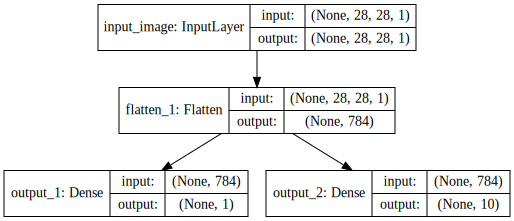

In [5]:
model_as_svg(m)

In [6]:
m.compile(optimizer='sgd', loss=['binary_crossentropy', 'categorical_crossentropy'])

In [7]:
img = np.random.random(size=(1,28,28,1))

In [8]:
p = m.predict(img)
p

[array([[ 0.52987033]], dtype=float32),
 array([[ 0.3056376 ,  0.38724217,  0.55166078,  0.33891007,  0.2556529 ,
          0.2712743 ,  0.67876822,  0.61177981,  0.76250398,  0.4633559 ]], dtype=float32)]

In [9]:
r = m.train_on_batch(img, p)
r

[11.032898, 0.69136167, 10.341537]

In [10]:
assert(len(r) == 3)

In [11]:
m.compile(optimizer='sgd', loss=['binary_crossentropy', 'sparse_categorical_crossentropy']) 

In [12]:
r = m.train_on_batch(img, [p[0], np.argmax(p[1], axis=1)])
r

[2.4943717, 0.69136167, 1.80301]

In [13]:
assert(len(r) == 3)